# Iris Species Classification 

### Group 126: Manya Jain, Zhuohang Lyu, Chang Sun

# Introduction

Iris is a genus of flowering plants with 310 recognised species and vivid flowers. Iris is both the common name and the scientific name for all species of Iris, as well as some species from other closely related genera.

### Question:
We shall answer the following question: Can we predict the species of the iris plant using the sepal and petal dimensions of the flower?

### Dataset Used:
The dataset that we will be using for the analysis is a multivariable dataset called the "Iris Flower Dataset," also known as Fisher’s Iris Data Set. The Iris dataset, which is also available on the UCI Machine Learning Repository, was utilised in R.A. Fisher's 1936 landmark paper ‘The Use of Multiple Measurements in Taxonomic Problems’.

These are the columns in this dataset:
- Id = Number of observation.
- SepalLengthCm = Length of sepal of iris species in centimeters.
- SepalWidthCm = Weidth of sepal of iris species in centimeters.
- PetalLengthCm = Length of petal of iris species in centimeters.
- PetalWidthCm = Width of petal of iris species in centimeters. 
- Species = Name of the species (Iris setosa, Iris virginica, or Iris versicolor) to which the observation belongs.

We intend to perform classification by stratifying the dataset by species.

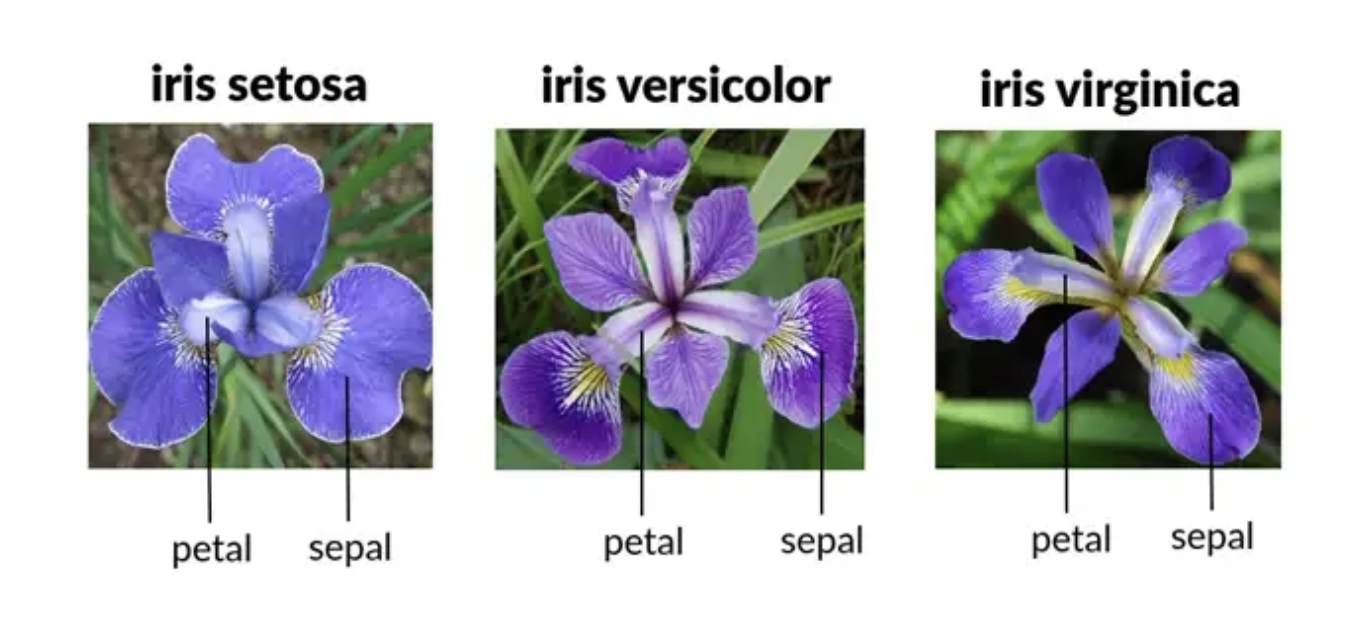

# Methods And Results:

### Loading The Packages
Firstly, we load the required packages in R to gain access to useful functions for performing the data analysis.

In [1]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading The Dataset

Then, we load the dataset from the link "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv" in GITHUB by using the `read_delim` function.

To get this into R using the read_delim function, we specify the first argument as the path to the file, and then provide values to the delim argument (here a comma which we represent by ",") and the `col_names` argument. read_csv, read_tsv and read_delim have a col_names argument and the default is `TRUE`.

We will name our dataset `iris`. 

In [2]:
url = "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv"
iris <- read_delim(url,
                  delim=",",
                  col_names=TRUE)
head(iris)
nrow(iris)

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


[1] 150

We observe that our dataset has six columns, each with a different variable to describe the flower, and 150 observations.

### Cleaning the dataset

We tidy the dataset by first converting the "Species" column from character to factor by using the `mutate` function. Moreover, we remove the "Id" column since the "Id" column is not useful for our following process, which we will accomplish using the `select` function. We name the result `iris_tidy`.

In [3]:
iris_tidy <- iris|>
             mutate(Species = as.factor(Species))|>
             select(!Id) 
head(iris_tidy)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


We will perform classification by stratifying the dataset by species. The predictors we will use are SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm. The characteristics of the appearance of flowers are closely related to their types, so we want to find out which type variable is more likely to determine the species of flowers. As a result, we separate the whole project into three different models.

### Describing the variables
We can verify the levels of the Species column by using the `levels` function, which should return the name of each category in that column. First, we `pull` out only the Species column from the dataset.

In [4]:
iris_tidy |> 
          pull(Species) |>
          levels()

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

We observe that the column `Species` has three categories, as mentioned above.

### Exploring the iris data
Below, we use the `group_by`, `summarize` and `n` functions to find the number and percentage of each species of observation in our dataset.

In [5]:
num_obs <- nrow(iris_tidy)
iris_count <- iris_tidy |>
           group_by(Species) |>
           summarize(count = n(),
                     percentage = n() / num_obs * 100)
iris_count

Species,count,percentage
<fct>,<int>,<dbl>
Iris-setosa,50,33.33333
Iris-versicolor,50,33.33333
Iris-virginica,50,33.33333


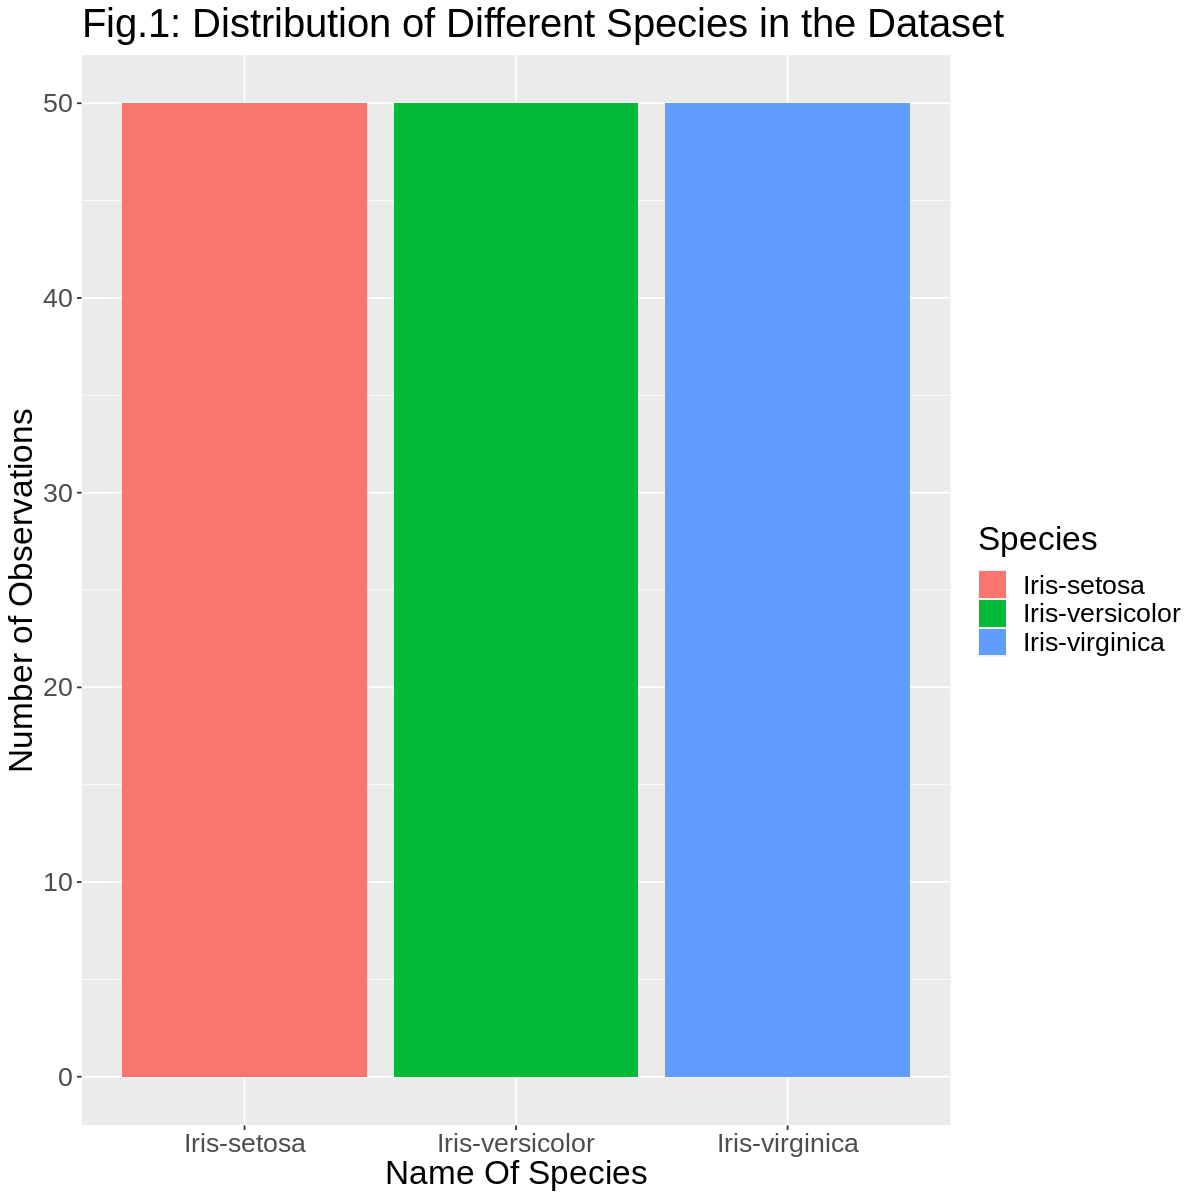

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)

iris_tidy_plot <- ggplot(iris_count, aes(x= Species, y = count, fill = Species)) +
                  geom_bar(stat = "identity") +
                  theme(text=element_text(size=20)) +
                  labs(x = "Name Of Species", y = "Number of Observations")+
                  ggtitle("Fig.1: Distribution of Different Species in the Dataset")
                  
iris_tidy_plot

We have 50 observations (33.33%) of each of the three iris species (Iris setosa, Iris virginica, and Iris versicolor).

### Splitting the data into a training and test set

Using the golden rule of machine learning, we split the dataset into training data and testing data using the `training` and `testing` functions respectively, to make the training and testing datasets. The testing data will be used as the "test" to evaluate the accuracy of this classifier. But before that, we will set `seed 300` here to make our prediction random and reproducible. We use 80 percent of the original dataset by using the `initial split` function and `prop = 0.8`. We only use the training data to create the classifier.

In [7]:
set.seed(300)
iris_split <- initial_split(iris_tidy, prop= 0.8, strata = Species)
iris_train <- training(iris_split)
iris_test <- testing(iris_split)

iris_split

<Training/Testing/Total>
<120/30/150>

At this point, we have calculated the required statistics based on the data input into the recipe, but the data has not been scaled and centered.

### Preprocessing The Data (Centering and Scaling)

As K-nearest neighbors is sensitive to the scale of the predictors, we will preprocess the data to standardize it. We will add scaling (`step_scale`) and centering (`step_center`) steps for all of the predictors so that they each have a mean of 0 and standard deviation of 1.

Below, we use `set.seed (300)` and construct the recipe with training data, scaling all of the training data. We will be using all the numerical columns as predictors.

In [8]:
set.seed(300)

iris_recipe <- recipe(Species ~., data = iris_train) %>%
               step_scale(all_predictors()) %>%
               step_center(all_predictors())
iris_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Training the classifier

Since we still have no idea of the value of neighbors, we write `tune()` in neighbors to find the best value of k in the `nearest_neighbor` function. Moreover, we put `kknn` in the engine and use `classification` as the mode. We name it `knn_spec`.

In [9]:
set.seed(300)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
            set_engine("kknn")|>
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Perform Cross Validation 

We will perform the 5-fold cross-validation method below by using the `vfold_cv` function and using Species as the argument in `strata`. The result is named `iris_vfold`.

In [10]:
set.seed(300)

iris_vfold <- vfold_cv(iris_train, v = 5, strata = Species)

#### Creata a Tibble To Classify

We now create a tibble that includes the sequence from 1 to 20 below and name it `gridvals`.

In [11]:
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

#### Add Everything In A Workflow

We need to create a model specification, combine the model specification and recipe into a `workflow` function, and then use `tune_grid` with resamples `iris vfold` and tibble `gridvals`. In the workflow, we use `iris_recipe` as the recipe and `knn_spec` as the model. Finally, we name the result as `iris_results`.

In [12]:
set.seed(300)

iris_results <- workflow()|>
                add_recipe(iris_recipe)|>
                add_model(knn_spec)|>
                tune_grid(resamples = iris_vfold, grid = gridvals)|>
                collect_metrics()
head(iris_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9083333,5,0.02429563,Preprocessor1_Model01
1,roc_auc,hand_till,0.9312500,5,0.01822172,Preprocessor1_Model01
2,accuracy,multiclass,0.9083333,5,0.02429563,Preprocessor1_Model02
2,roc_auc,hand_till,0.9520833,5,0.01875362,Preprocessor1_Model02
3,accuracy,multiclass,0.9333333,5,0.03118048,Preprocessor1_Model03
3,roc_auc,hand_till,0.9697917,5,0.01381927,Preprocessor1_Model03


We observe that the different value of neighbors bring the different accuracy from the tibble above. 

#### Predict The Accuracy

Below, we predict the accuracy of our result. Firstly, we will `filter` our observations from `iris_results` where `.metric` is accuracy.

In [13]:
accuracies <- iris_results |>
              filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9083333,5,0.02429563,Preprocessor1_Model01
2,accuracy,multiclass,0.9083333,5,0.02429563,Preprocessor1_Model02
3,accuracy,multiclass,0.9333333,5,0.03118048,Preprocessor1_Model03
4,accuracy,multiclass,0.9333333,5,0.03118048,Preprocessor1_Model04
5,accuracy,multiclass,0.9333333,5,0.03118048,Preprocessor1_Model05
6,accuracy,multiclass,0.9333333,5,0.03118048,Preprocessor1_Model06


We can decide which number of neighbors is best by plotting the accuracy versus K, as shown in Figure 2.

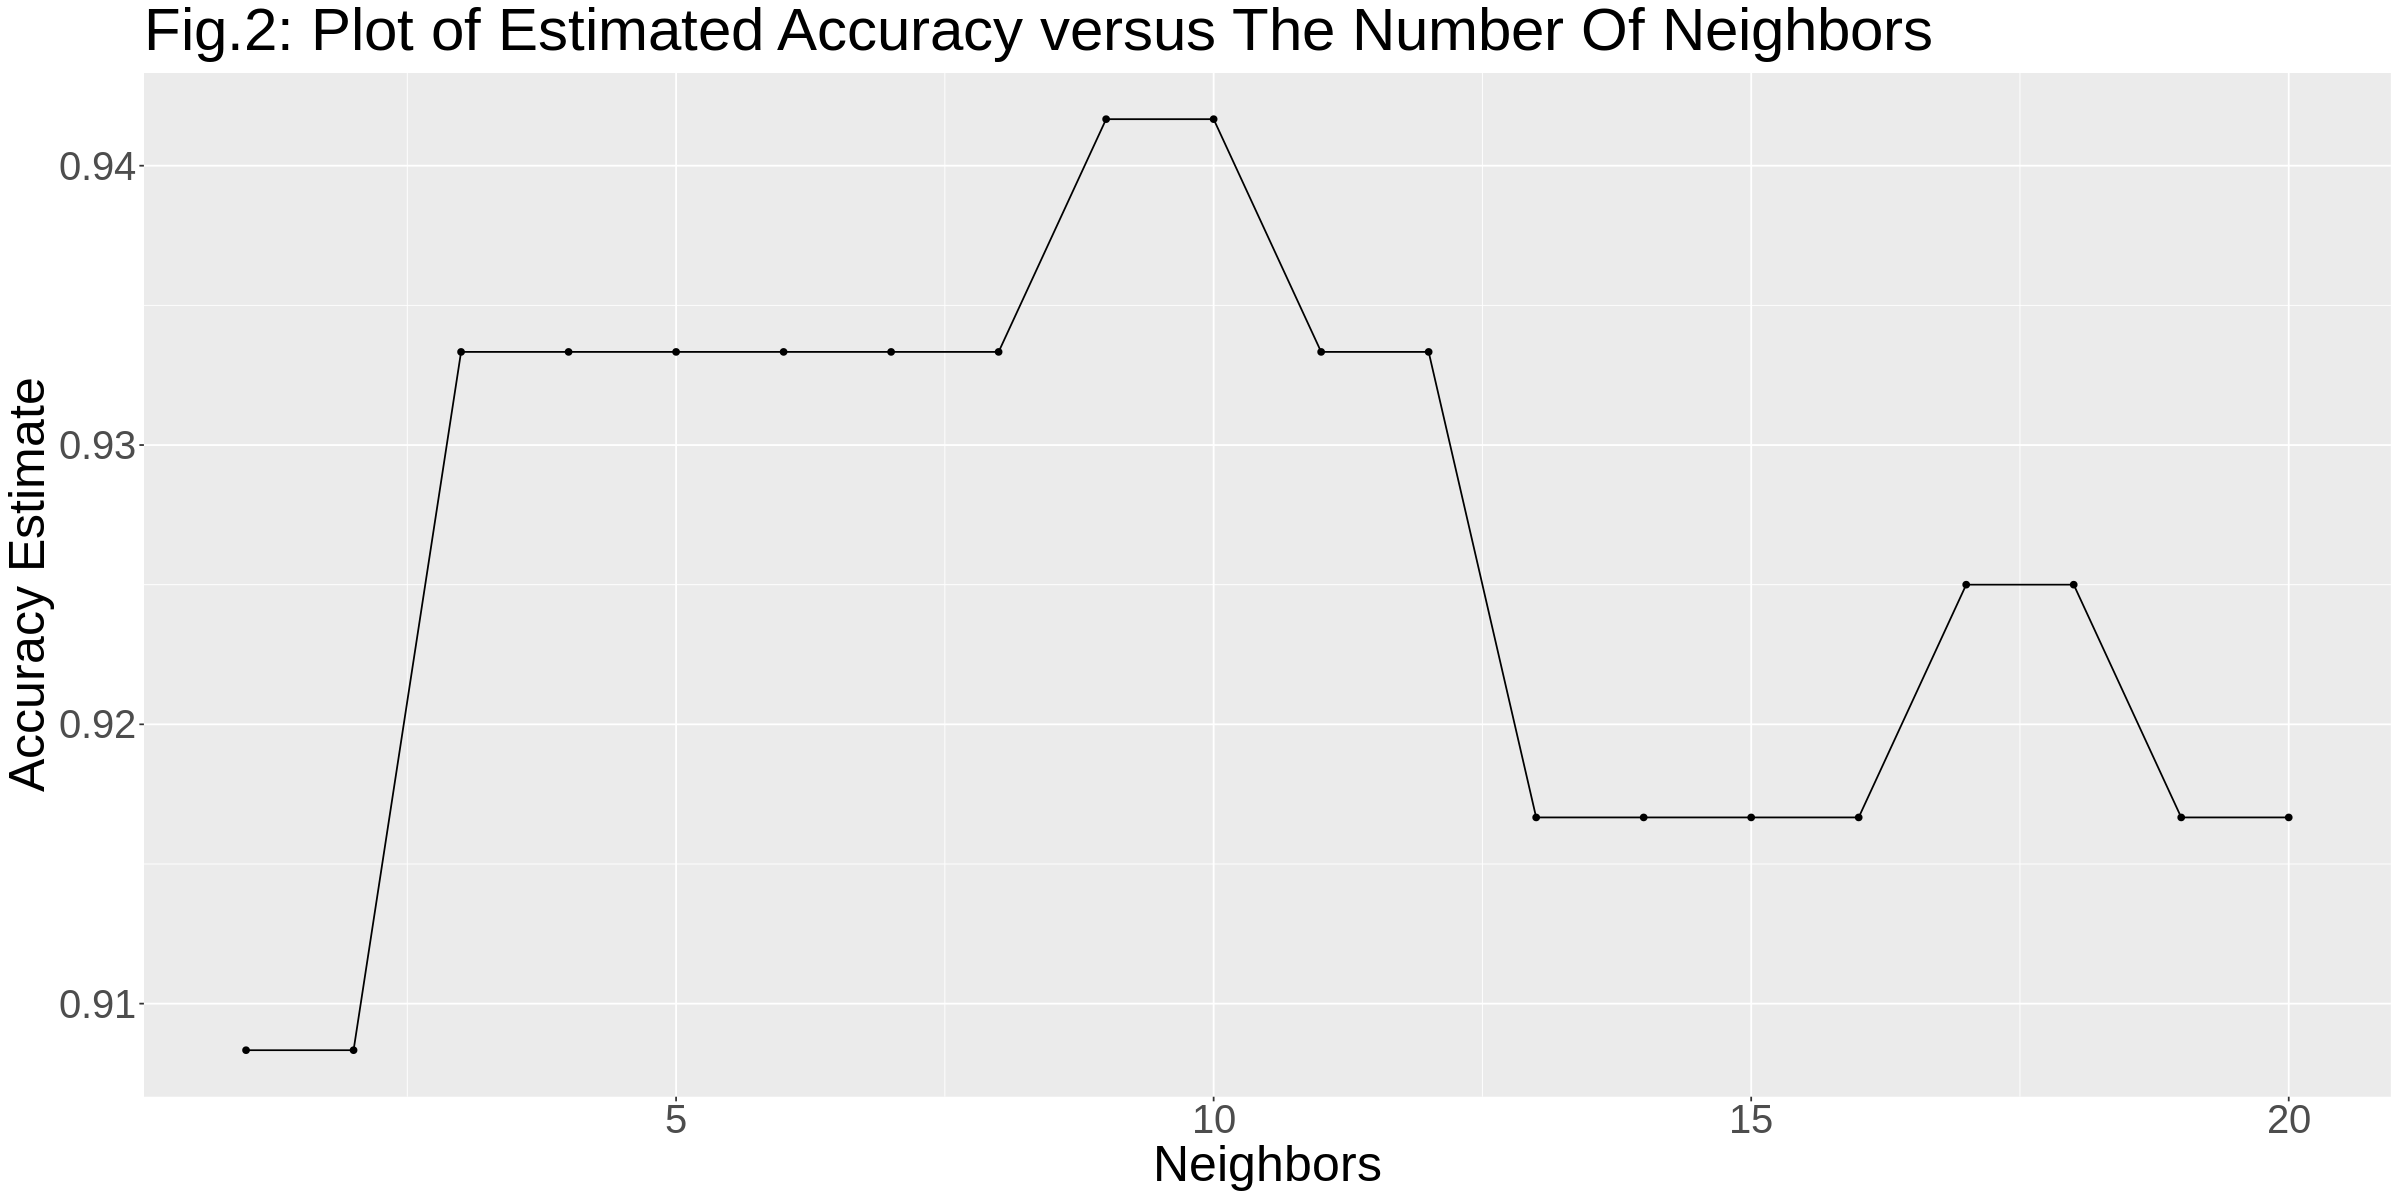

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10)

iris_val_plot <- accuracies |>
                 ggplot(aes(x = neighbors,y=mean)) +
                 geom_line() +
                 geom_point() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") +
                 ggtitle("Fig.2: Plot of Estimated Accuracy versus The Number Of Neighbors") +
                 theme(text = element_text(size = 30))
iris_val_plot

According to the graph above, there is no exact or perfect answer, but we choose 9 as the value of K because:
1. We get roughly optimal accuracy, and it is the first peak value. Also, it is an odd number, which makes the calculation easy.
2. Changing the value to a nearby one doesn’t change accuracy too much.
3. K = 9 does not create a prohibitively expensive computational cost of training.

Now we will create a new classifier by changing the value of K from tune() to 9 and naming it `knn_best_spec`. Then we repeat the `workflow` function and name it `iris_fit` by using the new model.

In [15]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
                 set_engine("kknn")|>
                 set_mode("classification")

iris_fit <- workflow() |>
            add_recipe(iris_recipe)|>
            add_model(knn_best_spec)|>
            fit(data=iris_train)
knn_best_spec
iris_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 9
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05833333
Best kernel: rectangular
Best k: 9

Finally, we use the `predict` function to predict the species and name it `iris_predictions`. We use `bind_cols` to add the column of predictions to the original test data, creating the `iris_predictions` data frame. The Species variable contains the true diagnoses, while the `.pred_class` contains the predicted diagnoses from the classifier.

In [16]:
iris_predictions <- predict(iris_fit, iris_test) |>
                    bind_cols(iris_test)
head(iris_predictions)

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,4.6,3.1,1.5,0.2,Iris-setosa
Iris-setosa,4.9,3.1,1.5,0.1,Iris-setosa
Iris-setosa,5.1,3.5,1.4,0.3,Iris-setosa
Iris-setosa,5.1,3.8,1.5,0.3,Iris-setosa
Iris-setosa,4.6,3.6,1.0,0.2,Iris-setosa
Iris-setosa,5.2,4.1,1.5,0.1,Iris-setosa


Now we estimate the accuracy of our classifier using the `metrics` function to get the statistics about the quality of our model, specifying the `truth` and `estimate` arguments. We name the final result `iris_accuracy`.

In [17]:
iris_accuracy <- iris_predictions |>
                 metrics(truth = Species, estimate = .pred_class) |>
                 select(.metric, .estimate) |>
                 head(1)
iris_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


In the metrics data frame, we selected the `.metric` and `.estimate` columns since we are interested in the `accuracy` row. We can conclude that our predicted accuracy for the model is about 96%.

We now use the `conf_mat` function shows the table of predicted labels and correct labels.

In [18]:
iris_cm <- iris_predictions |>
           conf_mat(truth = Species,estimate=.pred_class)
iris_cm

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

The confusion matrix shows that 10 observations each were correctly predicted as Iris-setosa and Iris-versicolor and 9 as Iris- virginica. Only 1 observation was predicted to be Iris-versicolor when it was truly Iris-verginica. 

The accuracy of 96% is quite good. However, according to the visualizations of the dataset below, we find out that the species may have a stronger relationship to the "petal". Thus, we want to figure out the different accuracies by using only the dimensions of sepals and petals.

### Dataset Visualisations
Now we will visualise our data using scatterplots.

First, we will try to establish if there is a relationship among the dimensions of the sepals of the three species using a scatterplot, naming the plot `sepal_plot`. We will use the function `ggplot` to create the scatterplot and number it `Fig.3`.

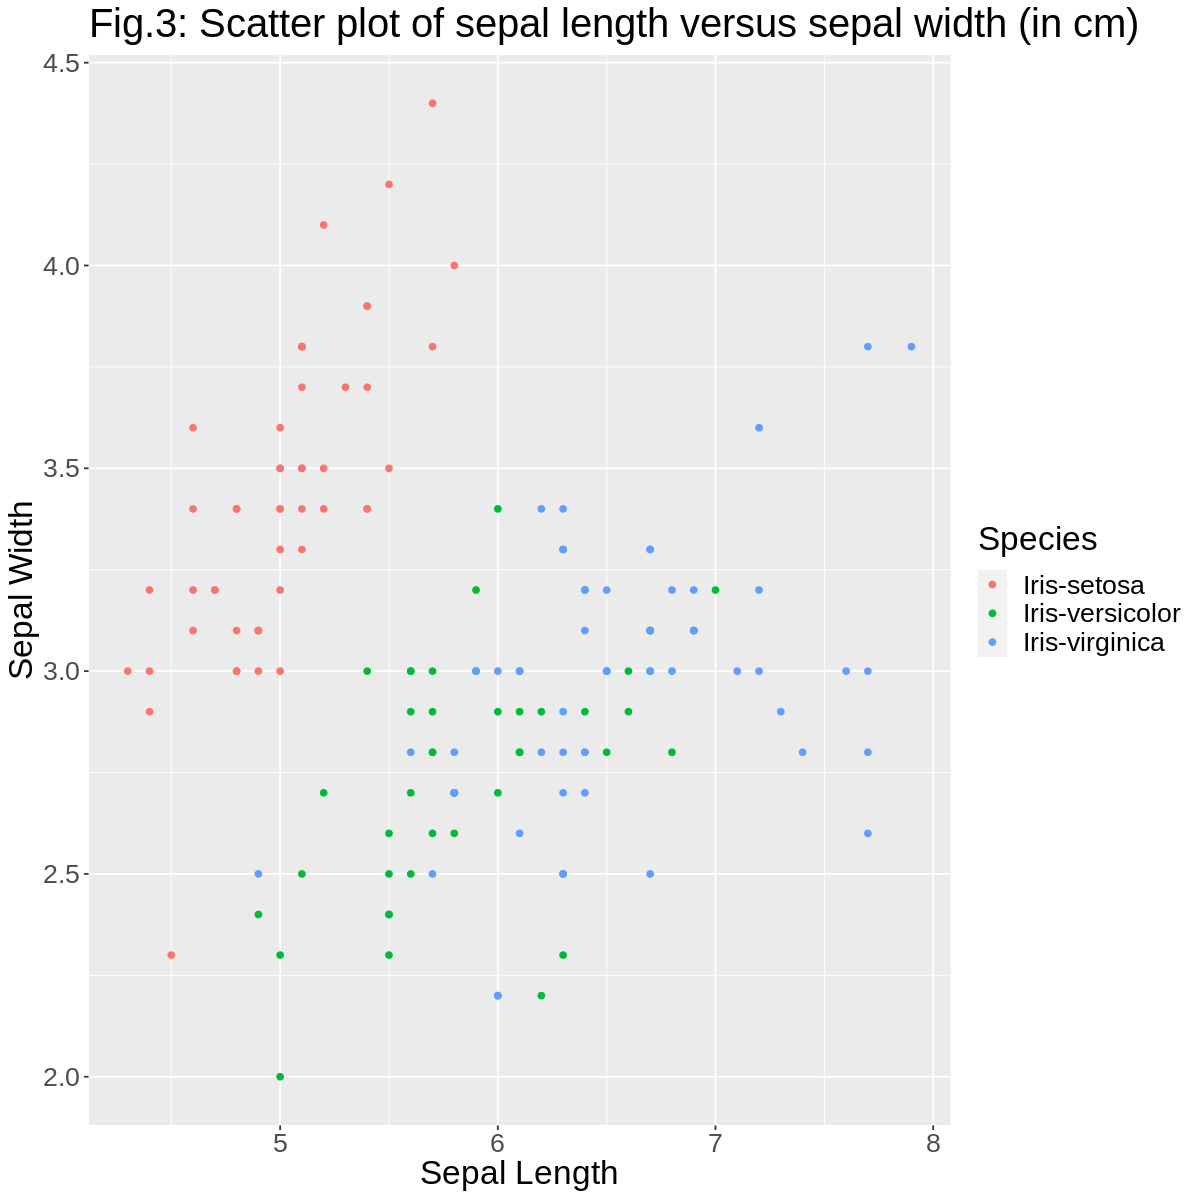

In [19]:
options(repr.plot.width=10 , repr.plot.height= 10)

sepal_plot <- iris_tidy |>
              ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
              geom_point() +
              ggtitle("Fig.3: Scatter plot of sepal length versus sepal width (in cm)") +
              labs(x = "Sepal Length", y = "Sepal Width") +
              theme(text=element_text(size=20))
sepal_plot

In figure 3, the plot relates the dimensions of the sepals (length and width) of the three species of flower iris. We conclude that there is a positive relationship between the sepal length and sepal width for all three species. But the relationship is weaker for Iris-versicolor and Iris-virginica than for Iris-setosa.

Also, the sepal dimensions are almost similar for Iris-versicolor and Iris-virginica.

We will now repeat the same process for the `petal` part, using the dimensions of the petal as variables and numbering the plot `Fig.4`.

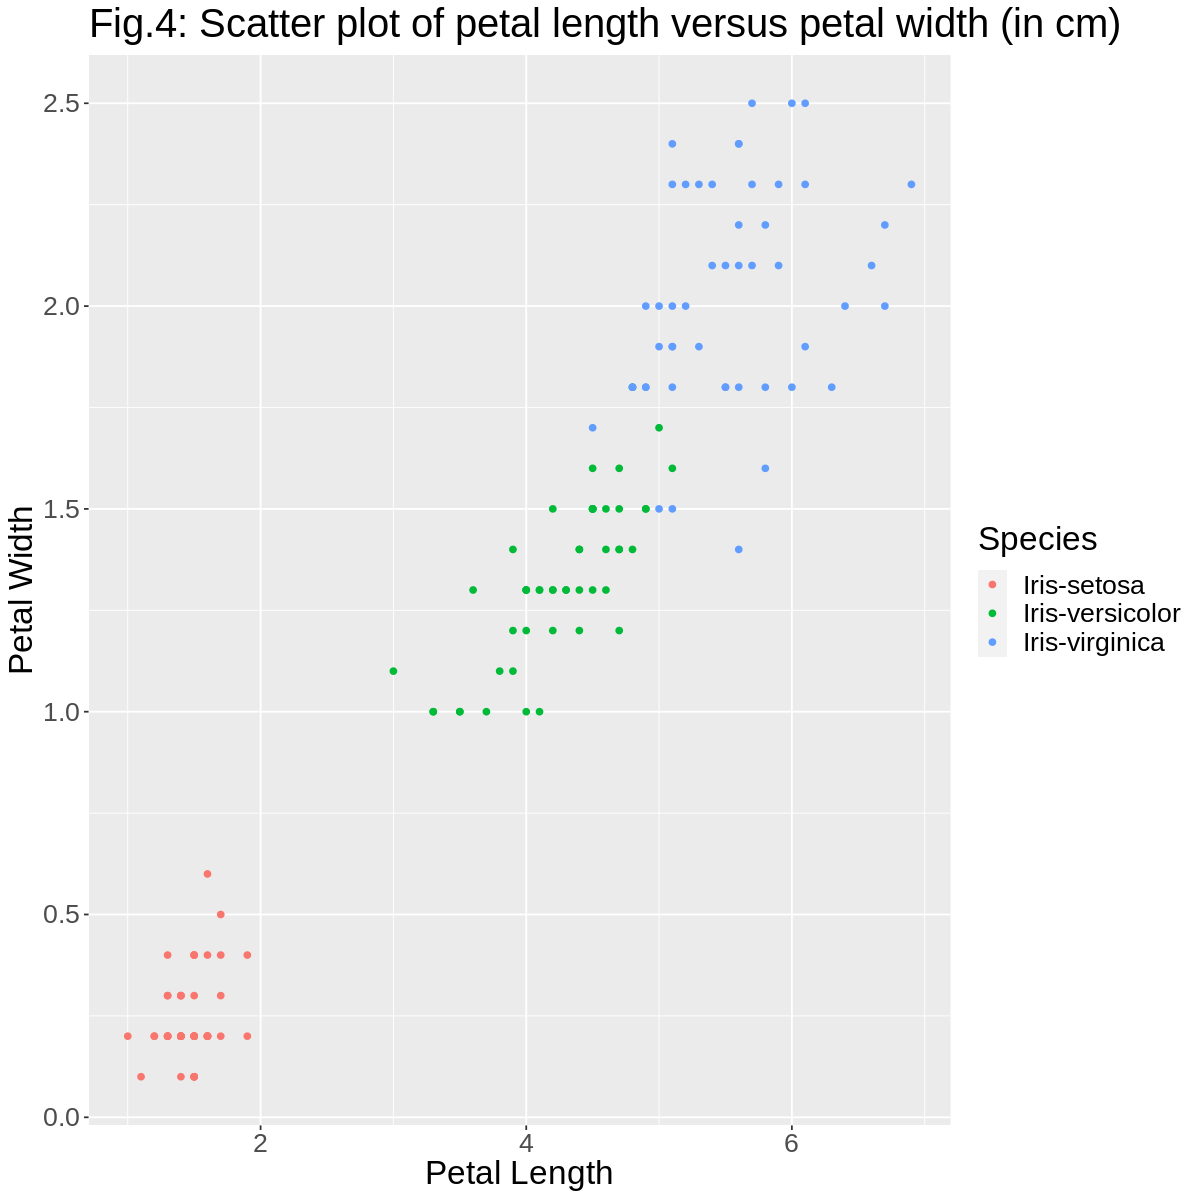

In [20]:
options(repr.plot.width=10 , repr.plot.height= 10)

petal_plot <- iris_tidy |>
              ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
              geom_point() +
              ggtitle("Fig.4: Scatter plot of petal length versus petal width (in cm)") +
              labs(x = "Petal Length", y = "Petal Width") +
              theme(text=element_text(size=20))
petal_plot

From figure 4, we establish a positive correlation between the petal dimensions. In addition, the dimensions are largest in Iris-virginia, followed by Iris-versicolor, and smallest in Iris-setosa.

##### We proceed with the analysis by splitting the data into two parts, the first having the dimensions of sepals and the other having those of petals. Then we will perform the entrire classification as done in the  `iris_tidy` process on these two subsets.

Starting with the sepal part, first we will `select` only the required columns of sepal dimensions (SepalLengthCm and SepalWidthCm) and column Species from `iris_tidy`, split the data, and repeat the process that we have done above. 

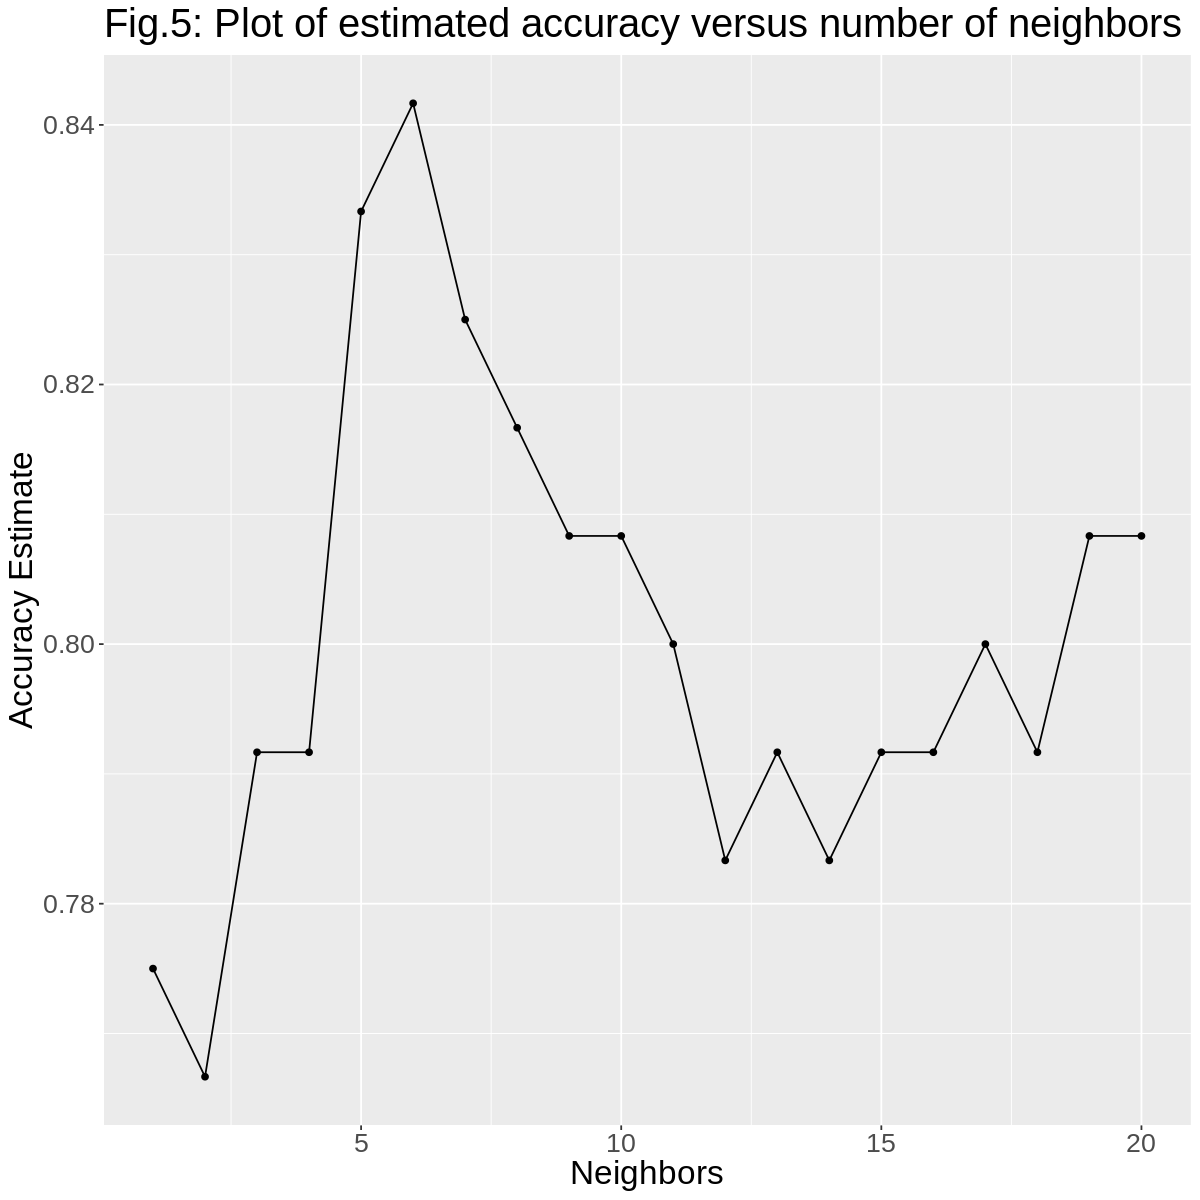

In [21]:
set.seed(300)

iris_sepal <- select(iris_tidy, SepalLengthCm, SepalWidthCm, Species)

iris_split_sepal <- initial_split(iris_sepal, prop = 0.8, strata = Species)
iris_train_sepal <- training(iris_split_sepal)
iris_test_sepal <- testing(iris_split_sepal)

iris_recipe_sepal <- recipe(Species ~., data = iris_train_sepal) |>
                     step_scale(all_predictors()) |>
                     step_center(all_predictors())

iris_vfold_sepal <- vfold_cv(iris_train_sepal, v = 5, strata = Species)

iris_results_sepal <- workflow() |>
                      add_recipe(iris_recipe_sepal) |>
                      add_model(knn_spec) |>
                      tune_grid(resamples = iris_vfold_sepal, grid = gridvals) |>
                      collect_metrics()
 
accuracies_sepal <- iris_results_sepal |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_sepal <- accuracies_sepal |>
                       ggplot(aes(x = neighbors, y = mean)) +
                       geom_line() +
                       geom_point() +
                       ggtitle("Fig.5: Plot of estimated accuracy versus number of neighbors") +
                       labs(x = "Neighbors", y = "Accuracy Estimate") +
                       theme(text = element_text(size = 20))
iris_val_plot_sepal

According to Fig.5, we choose K = 6 as because it is the first highest peak value, and repeat the classification process.

In [22]:
knn_best_spec_sepal <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
                       set_engine("kknn")|>
                       set_mode("classification")

iris_fit_sepal <- workflow() |>
                  add_recipe(iris_recipe_sepal) |>
                  add_model(knn_best_spec_sepal) |>
                  fit(data = iris_train_sepal)

iris_predictions_sepal <- predict(iris_fit_sepal,iris_test_sepal) |>
                          bind_cols(iris_test_sepal)
head(iris_predictions_sepal)

iris_accuracy_sepal <- iris_predictions_sepal |>
                       metrics(truth = Species, estimate = .pred_class) |>
                       select(.metric,.estimate) |>
                       head(1)
iris_accuracy_sepal

iris_cm_sepal <- iris_predictions_sepal |>
                 conf_mat(truth = Species,estimate=.pred_class)
iris_cm_sepal

.pred_class,SepalLengthCm,SepalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,4.6,3.1,Iris-setosa
Iris-setosa,4.9,3.1,Iris-setosa
Iris-setosa,5.1,3.5,Iris-setosa
Iris-setosa,5.1,3.8,Iris-setosa
Iris-setosa,4.6,3.6,Iris-setosa
Iris-setosa,5.2,4.1,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.7666667


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               6              3
  Iris-virginica            0               4              7

This confusion matrix shows that 23 observations were correctly predicted and 7 incorrectly. We have established that the accuracy is about 76% when using only the sepal dimensions.

Now we will repeat our analysis for the `Petal` part by performing the same steps as above, but using only the petal dimensions from the dataset.

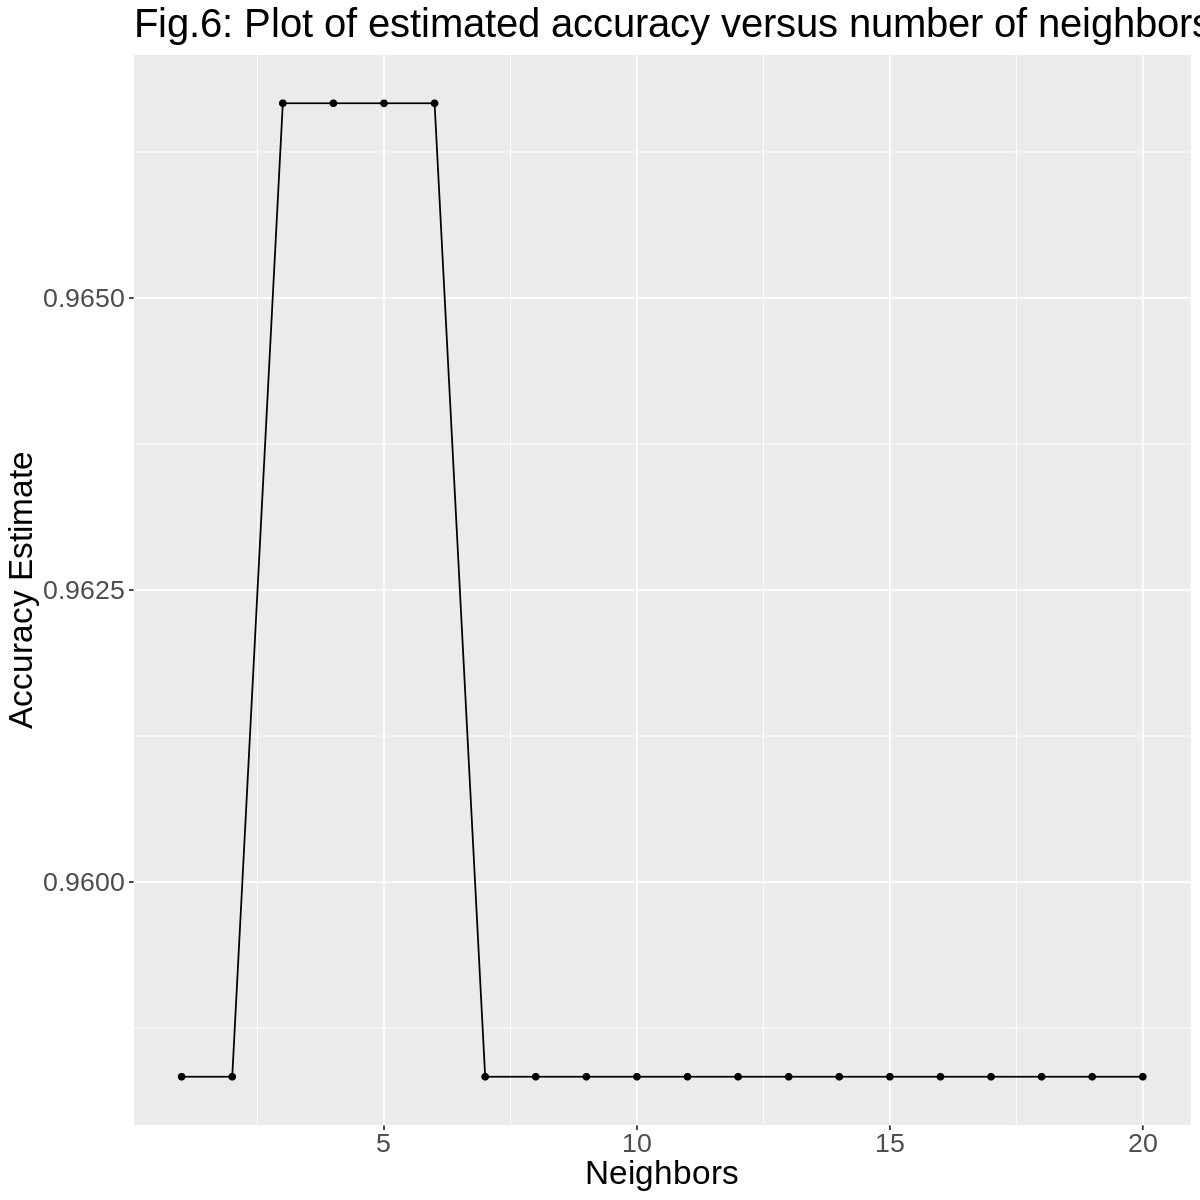

In [23]:
set.seed(300)

iris_petal <- select(iris_tidy, PetalLengthCm, PetalWidthCm, Species)

iris_split_petal <- initial_split(iris_petal, prop = 0.8, strata = Species)
iris_train_petal <- training(iris_split_petal)
iris_test_petal <- testing(iris_split_petal)

iris_recipe_petal <- recipe(Species ~., data = iris_train_petal) %>%
                     step_scale(all_predictors()) %>%
                     step_center(all_predictors())

iris_vfold_petal <- vfold_cv(iris_train_petal, v = 5, strata = Species)

iris_results_petal <- workflow() |>
                      add_recipe(iris_recipe_petal) |>
                      add_model(knn_spec) |>
                      tune_grid(resamples = iris_vfold_petal, grid=gridvals) |>
                      collect_metrics()

accuracies_petal <- iris_results_petal |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_petal <- accuracies_petal |>
                       ggplot(aes(x = neighbors, y = mean)) +
                       geom_line() +
                       geom_point() +
                       ggtitle("Fig.6: Plot of estimated accuracy versus number of neighbors") +
                       labs(x = "Neighbors", y = "Accuracy Estimate") +
                       theme(text = element_text(size = 20))
iris_val_plot_petal

We again choose 5 as the value of k-neighbors, as it is an odd number and gives the value of K that gives the highest accuracy, and repeat the classification process as above.

In [24]:
knn_best_spec_petal <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                       set_engine("kknn") |> 
                       set_mode("classification")

iris_fit_petal <- workflow() |>
                  add_recipe(iris_recipe_petal) |>
                  add_model(knn_best_spec_petal) |>
                  fit(data=iris_train_petal)

iris_predictions_petal <- predict(iris_fit_petal, iris_test_petal) |>
                          bind_cols(iris_test_petal)

head(iris_predictions_petal)

iris_accuracy_petal <- iris_predictions_petal |>
                       metrics(truth= Species,estimate=.pred_class) |>
                       select(.metric,.estimate) |>

head(1)
iris_accuracy_petal

iris_cm_petal <- iris_predictions_petal |>
                 conf_mat(truth = Species,estimate=.pred_class)
iris_cm_petal

.pred_class,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,1.5,0.2,Iris-setosa
Iris-setosa,1.5,0.1,Iris-setosa
Iris-setosa,1.4,0.3,Iris-setosa
Iris-setosa,1.5,0.3,Iris-setosa
Iris-setosa,1.0,0.2,Iris-setosa
Iris-setosa,1.5,0.1,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              0
  Iris-virginica            0               1             10

From the above analysis, we predict that there is only 1 incorrectly predicted observation, like in the first model. The accuracy is about 96% when using only the petal dimensions.

#### Comparing the three models:
Firstly, we will add a new column named `model` to the predicted accuracy table of each model, which states the name of the model. We will then compare the accuracies of the three models we created by putting them in one single table, `comparison_table` using the function `rbind`.

In [25]:
iris_accuracy <- iris_accuracy %>% mutate(model = "all")
iris_accuracy_sepal <- iris_accuracy_sepal %>% mutate(model = "sepal")
iris_accuracy_petal <- iris_accuracy_petal %>% mutate(model = "petal")

In [26]:
comparison_table <- rbind(iris_accuracy,iris_accuracy_sepal,iris_accuracy_petal) %>%
                    mutate(metric = .metric,
                           estimate = round((100 * .estimate), 3)) %>%
                    select(model:estimate)
comparison_table

model,metric,estimate
<chr>,<chr>,<dbl>
all,accuracy,96.667
sepal,accuracy,76.667
petal,accuracy,96.667


We can compare the accuracies easily using a bar plot, using the function `ggplot`.

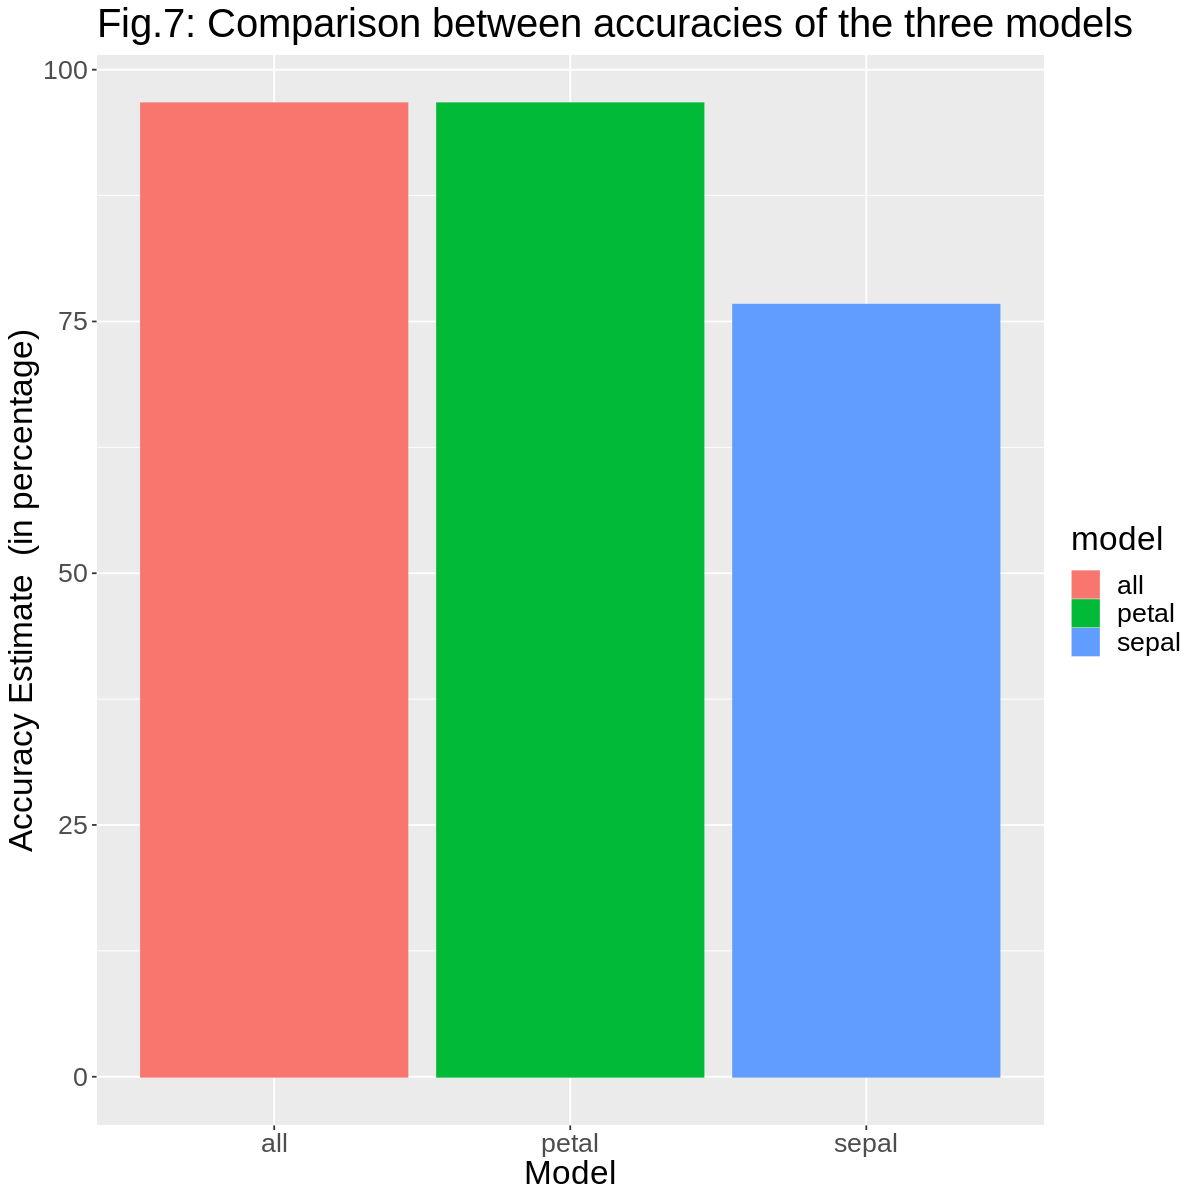

In [27]:
comparison_plot <- ggplot(comparison_table, aes(x = model, y = estimate, color = model, fill = model)) +
                   geom_bar(stat = "identity") +
                   theme(text=element_text(size=20)) +
                   labs(x = "Model", y = "Accuracy Estimate  (in percentage)")+
                   ggtitle("Fig.7: Comparison between accuracies of the three models")

comparison_plot                  

In Fig.7, by putting together the three accuracies, we can find out that the petal part and overall data both have the same accuracy. In addition, their accuracy has a much higher value than the sepal model.

# Expected outcomes and significance:

#### SUMMARY
1. Setosa species have the smallest petal length as well as petal width.
2. Versicolor species have average petal length and petal width.
3. Virginica species have the highest petal length as well as petal width.
4. There is a positive correlation between petal length and petal width.
5. The sepal width for setosa is high and the length is low.
6. Versicolor has average values for sepal dimensions.
7. Virginica has a small width but a large sepal length.

We created three models:

1. First, using the entire dataset (using 4 predictors).

2. Second, using columns having  only petal dimensions (using 2 predictors).

3. Third, using columns having only the sepal dimensions (using 2 predictors).

By comparing the three models, we concluded that the accuracy of the estimate we measured from the first model is equal to that of the third model.

Based on it, we can make use of the third model to predict the species of the flowers because of its easy implementation and low cost, as only two variables are used instead of four, which may facilitate the selection and breeding of better varieties.

### Discussion:
#### 1. Discuss whether this is what you expected to find? 
In this project, our expected outcome was to be able to identify the species of iris based on the dimensions of its sepals and petals (length and width).

By comparing the three models, we concluded that the accuracy of the estimate we measured from the first model is equal to that of the third model.

Based on it, we can make use of the third model to predict the species of the flowers because of its easy implementation and low cost, as only two variables are used instead of four, which may facilitate the selection and breeding of better varieties.

#### 2. Discuss what impact could such findings have?
Since we found that the size of the sepal of the iris does not distinguish well between species of iris, we conjectured that perhaps the petals would help us to distinguish iris. After verification, we found that Setosa species have the smallest petal length as well as petal width, while Versicolor species have average petal length and petal width. We know that plants that grow in the tropics usually have larger leaves, while plants that can grow in colder regions usually have thin, small leaves to prevent heat and water loss, such as pine trees. We therefore believe that the size of the petals may be related to the environment in which the iris grows, and that this is the reason for the differences in iris species. So the terrain in which the flower is grown also affects the classification.

#### 3. Discuss what future questions could this lead to?
Iris flowers appear to be much larger in warmer areas than in colder ones. Changes in petal length may lead to better survival as a result of adaptation to the environment. Setosa is found in Arctic regions and has the smallest petals. Versicolor is common in the eastern United States and Canada. Virginica is found in the southeastern United States along the coastal plain from Florida to Georgia. (Kamenetsky & Okubo, 2012).
Based on the information provided above, a future question our project could lead to is "Which species of the iris flower appear in which region?"

### Citations of Literature:
1. Randolph, L. F. (1934). “Chromosome numbers in native American and introduced species and cultivated varieties of Iris. Bull. Amer. Iris Soc. 52, 61–66.
2. Kamenetsky, R., & Okubo, H. (2012). Ornamental geophytes: From basic science to sustainable production. CRC Press. 
3. #### Source of picture: 
Nivitus. (2020, June 30). Iris flower classification - machine learning&nbsp;... Medium. Retrieved December 7, 2022, from https://medium.com/@Nivitus./iris-flower-classification-machine-learning-d4e337140fa4 
4. UCI Machine Learning Repository: Iris data set. (n.d.). Retrieved December 7, 2022, from https://archive.ics.uci.edu/ml/datasets/iris 

### Source Of Data:
UCI Machine Learning Repository: Iris data set. (n.d.). Retrieved December 7, 2022, from https://archive.ics.uci.edu/ml/datasets/iris 